In [4]:
# imports
%load_ext autoreload
%autoreload 2
from victor_thesis_experiments import *
from victor_thesis_utils import *
from victor_thesis_landscapes import *
from victor_thesis_plots import *
from victor_thesis_metrics import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# n-dim tests
def n_dim_tests(
):
    qnn = get_qnn("CudaPennylane", list(range(1)), 1, device="cpu")
    unitary = torch.tensor(
        np.array([[1, 1], [1, -1]]) / np.sqrt(2), dtype=torch.complex128, device="cpu"
    )
    num_ticks = 12
    # generate data points
    non_entangled_inputs = generate_random_datapoints(5, 1, unitary)
    entangled_inputs = generate_random_datapoints(5, 2, unitary)
    z_o_inputs = get_zero_one_datapoints()
    # get 3d landscapes
    loss_z_o_3d= generate_3D_loss_landscape(
        num_ticks, z_o_inputs, unitary
    )
    loss_non_ent_3d= generate_3D_loss_landscape(
        num_ticks, non_entangled_inputs, unitary
    )
    loss_ent_3d= generate_3D_loss_landscape(
        num_ticks, entangled_inputs, unitary
    )
    landscapes = [loss_z_o_3d, loss_non_ent_3d, loss_ent_3d]
    #test scalar curvature
    # print(get_scalar_curvature(landscapes[0]))
    # get_scalar_curvature(landscapes[1])
    # get_scalar_curvature(landscapes[2])
    #test total variation
    print(
        "TOTAL VARIATION: ",
        calc_total_variation(landscapes[0]),
        calc_total_variation(landscapes[1]),
        calc_total_variation(landscapes[2]),
    )
    #test igsd
    for landscape in landscapes:
        igsd = calc_IGSD(landscape)
        count = 1
        for sd in igsd:
            print(f"IGSD (dir {count}): {sd}")
            count +=1
        print("---------")
    #test fourier stuff
    fourier_result_non_ent = get_fourier_landscape(
        non_entangled_inputs, unitary, qnn
    )
    print(fourier_result_non_ent)
n_dim_tests()

TOTAL VARIATION:  312.79 280.83 350.28
ls (20, 20, 20)
grads (3, 20, 20, 20)
IGSD (dir 1):  13.0
IGSD (dir 2):  12.85
---------
ls (20, 20, 20)
grads (3, 20, 20, 20)
IGSD (dir 1):  21.11
IGSD (dir 2):  30.7
---------
ls (20, 20, 20)
grads (3, 20, 20, 20)
IGSD (dir 1):  18.23
IGSD (dir 2):  17.85
---------


IndexError: index 2 is out of bounds for dimension 2 with size 2

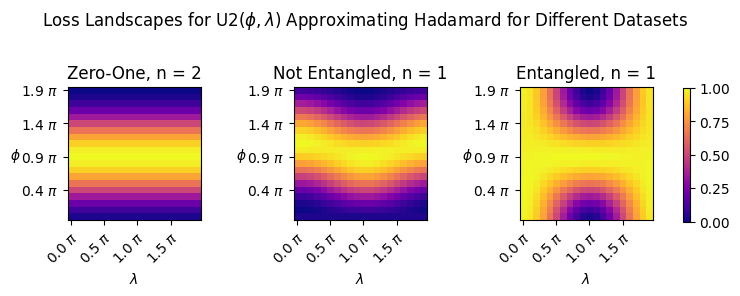

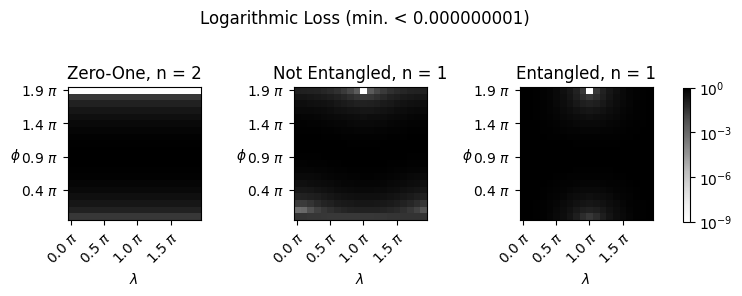

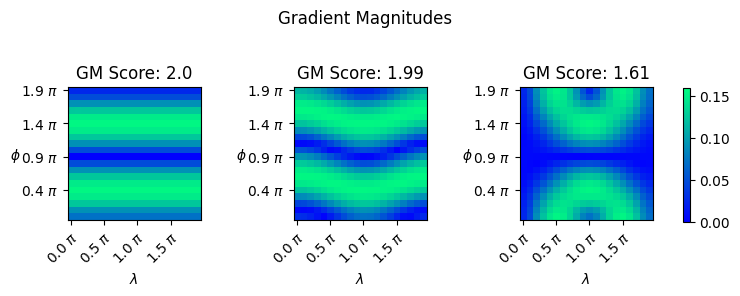

TOTAL VARIATION:  12.56 14.74 12.44
IGSD (dir 1):  9.09
IGSD (dir 2):  2.514153754497705e+16
---------
IGSD (dir 1):  9.35
IGSD (dir 2):  39.55
---------
IGSD (dir 1):  14.84
IGSD (dir 2):  15.19
---------
Frequency Domain for Plot 3
Fourier Density: 1.67


KeyboardInterrupt: 

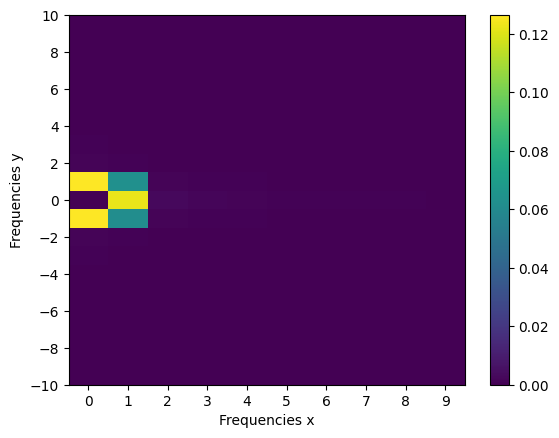

In [ ]:
# EXP on Hadamard
run_hadamard()

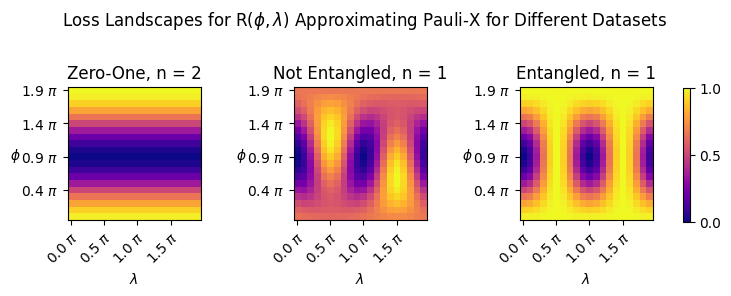

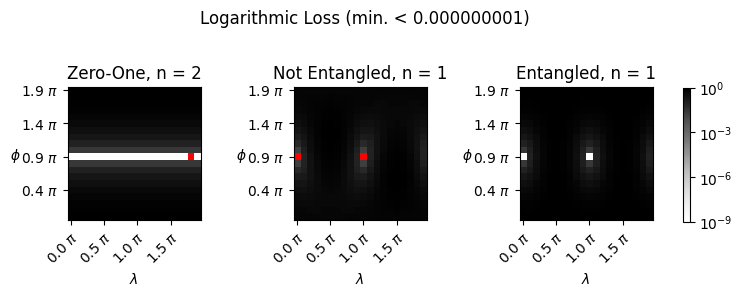

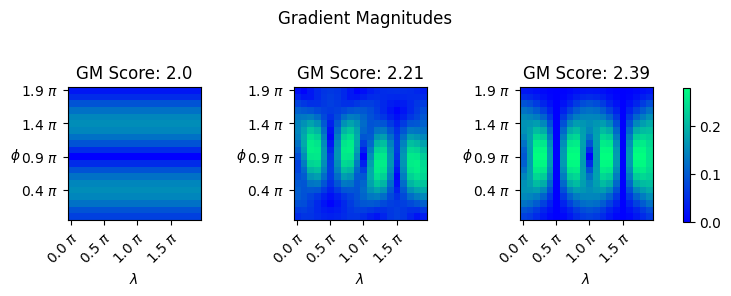

20
20
20
TOTAL VARIATION:  12.56 16.7 18.18
IGSD (dir 1):  9.09
IGSD (dir 2):  1.833841239060594e+16
---------
IGSD (dir 1):  19.69
IGSD (dir 2):  8.3
---------
IGSD (dir 1):  14.84
IGSD (dir 2):  7.68
---------
Frequency Domain for Plot 3
Fourier Density: 1.642


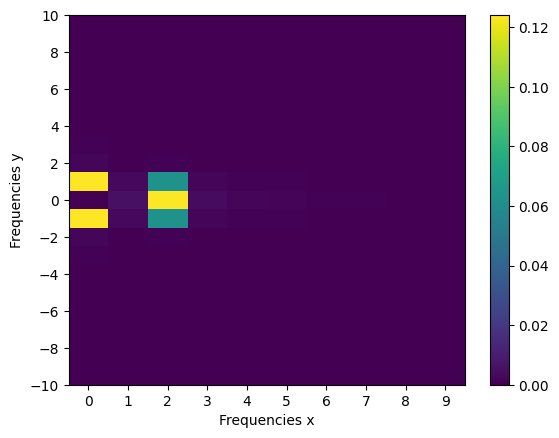

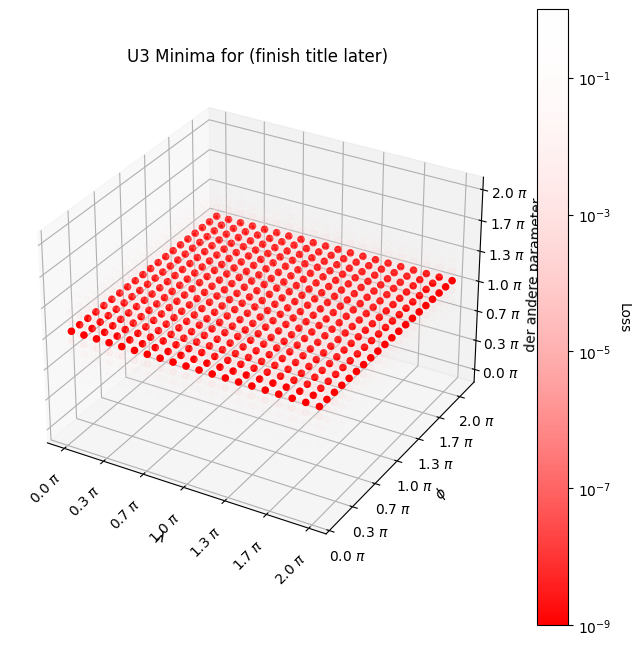

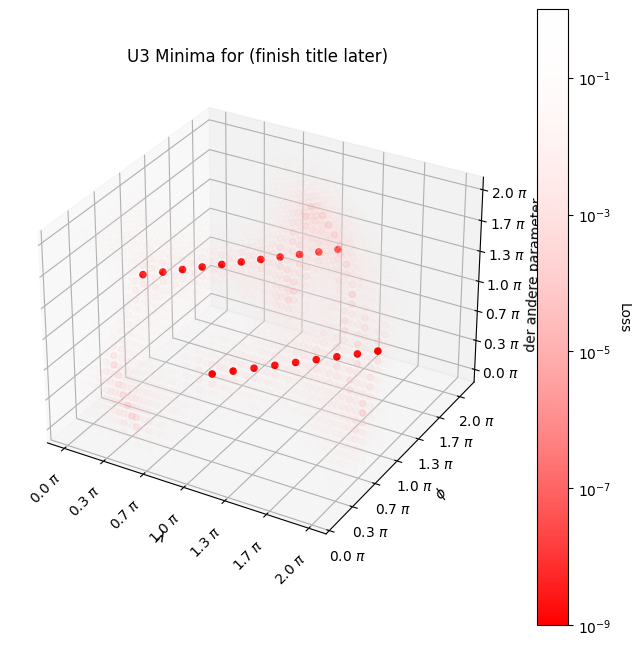

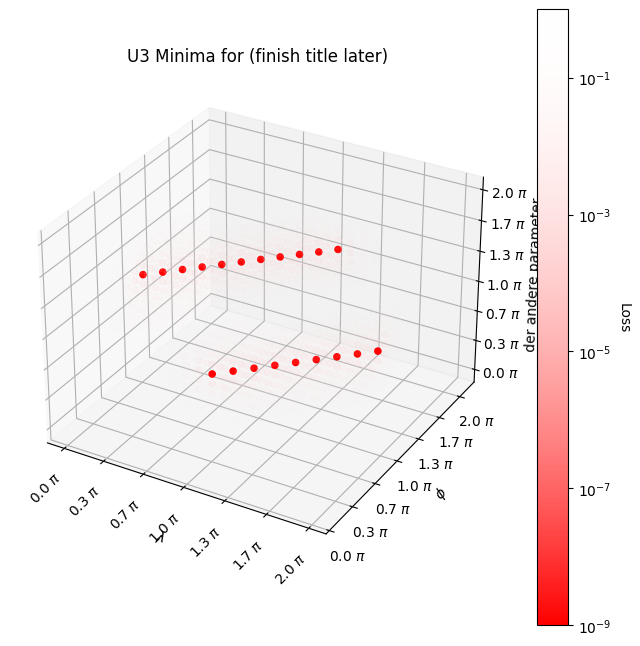

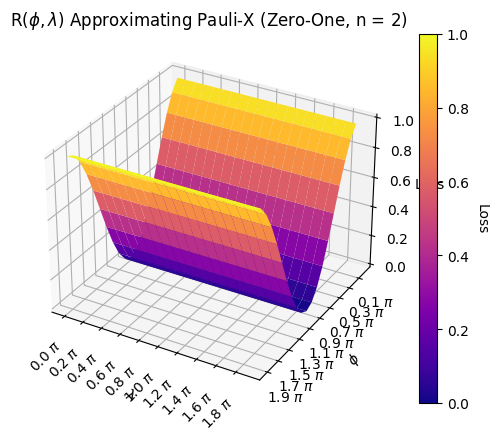

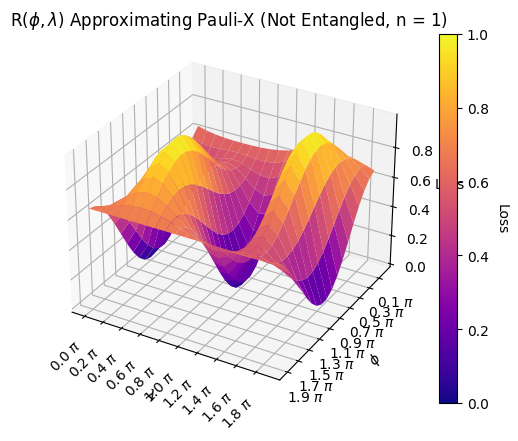

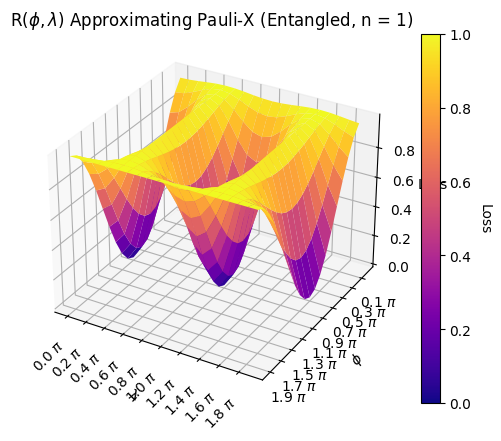

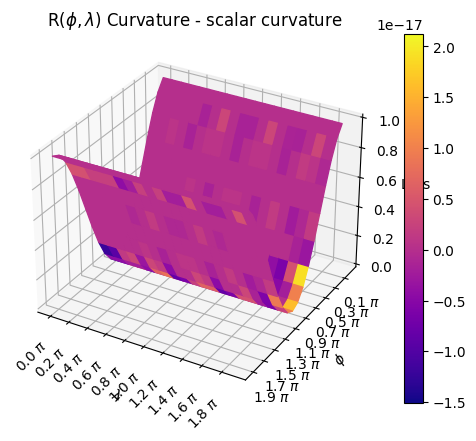

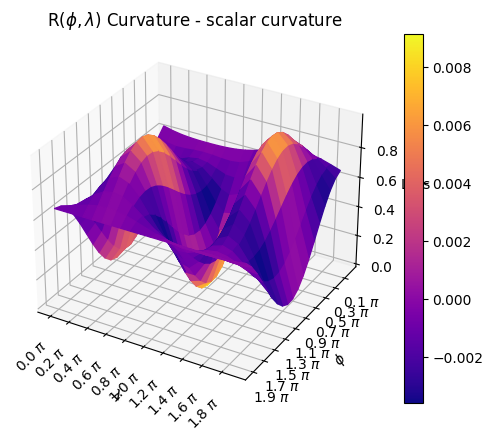

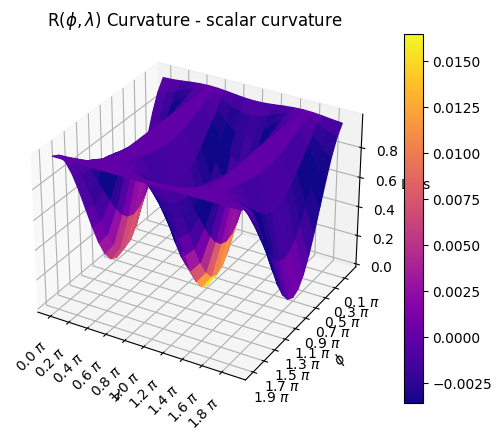

In [ ]:
# EXP on Pauli-X
run_pauli_x()

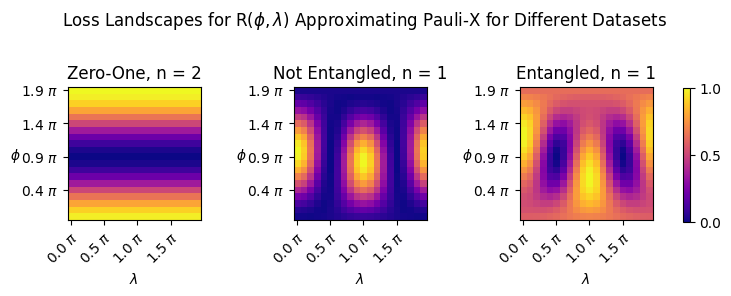

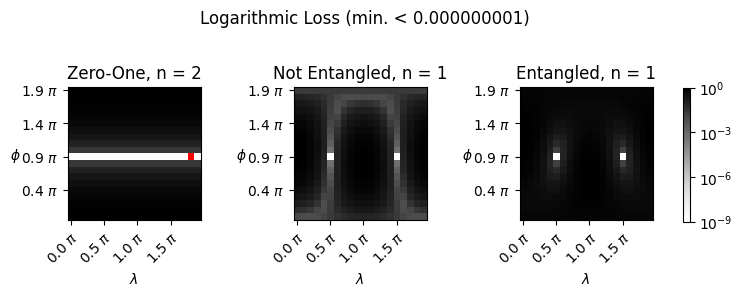

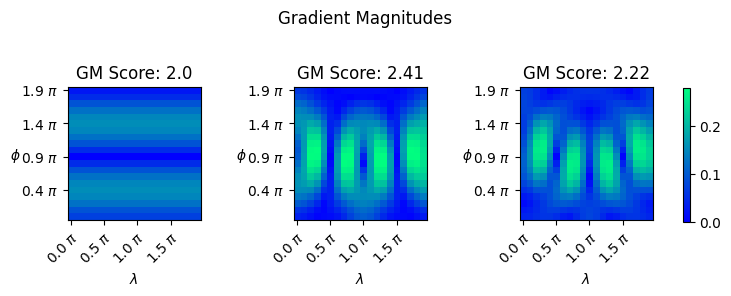

20
20
20
TOTAL VARIATION:  12.56 18.32 16.91
IGSD (dir 1):  9.09
IGSD (dir 2):  1.833841239060594e+16
---------
IGSD (dir 1):  14.93
IGSD (dir 2):  7.71
---------
IGSD (dir 1):  19.66
IGSD (dir 2):  8.33
---------
Frequency Domain for Plot 3
Fourier Density: 1.287


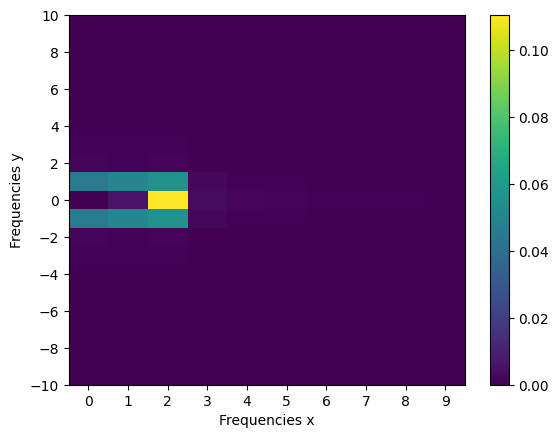

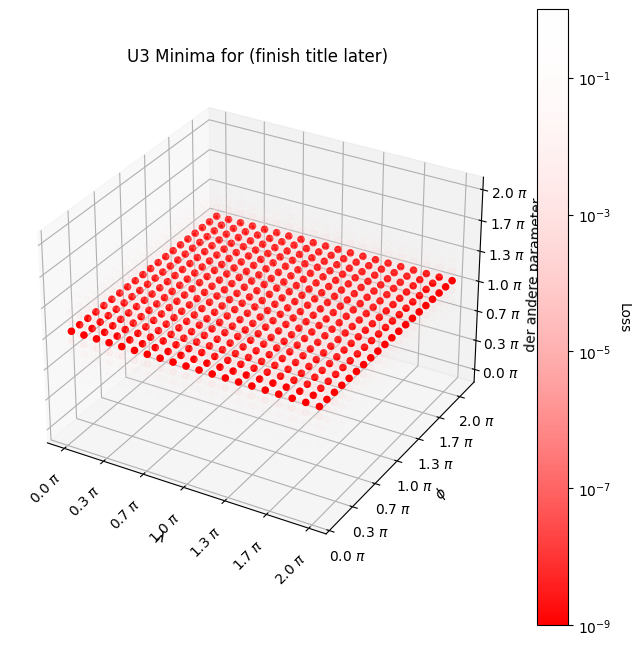

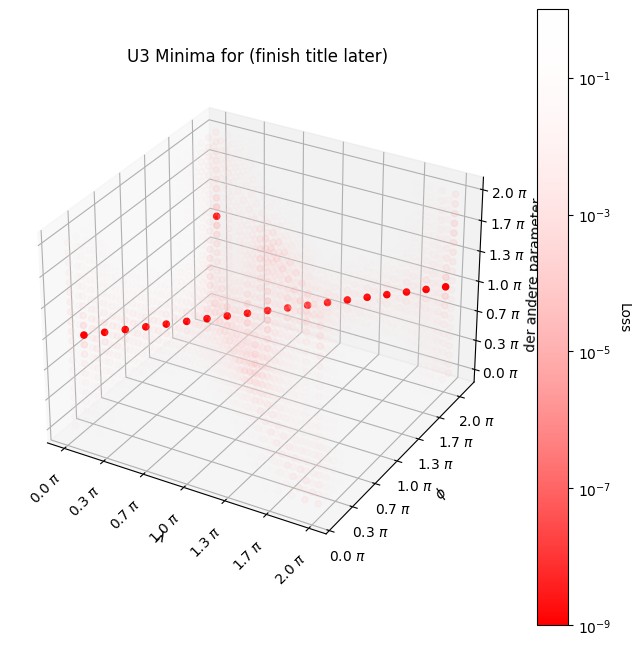

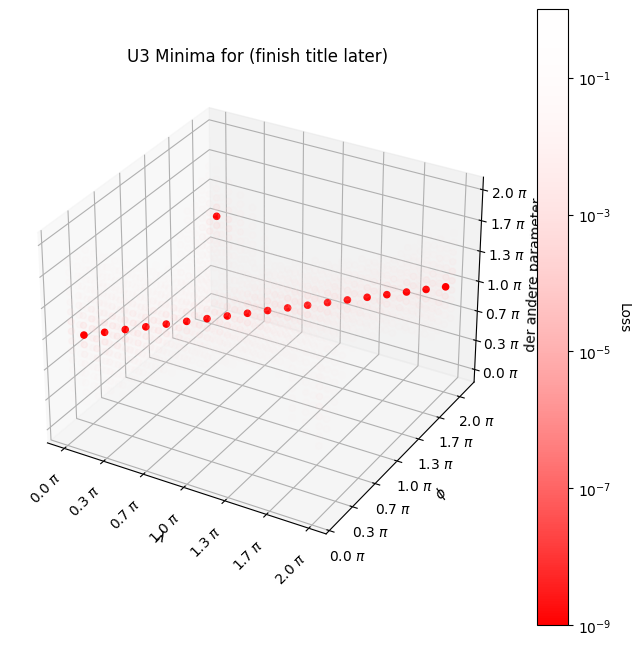

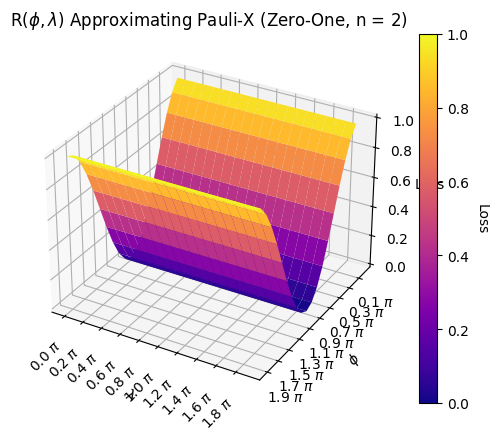

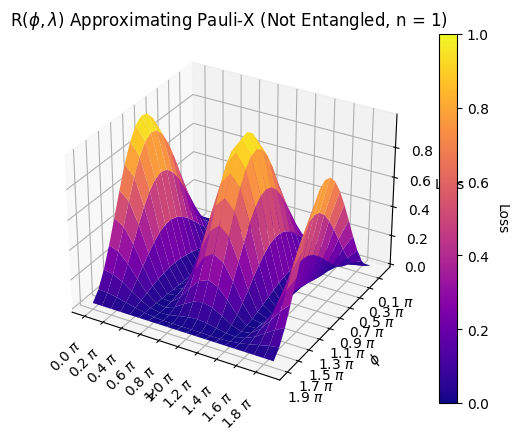

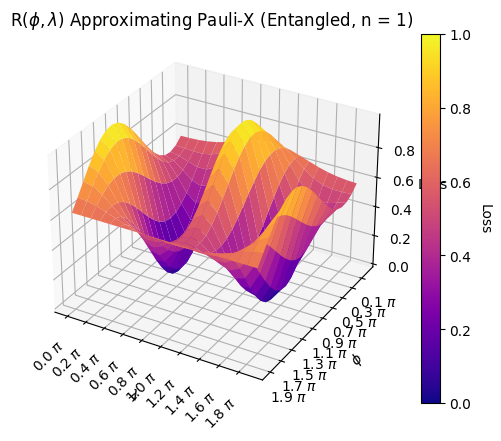

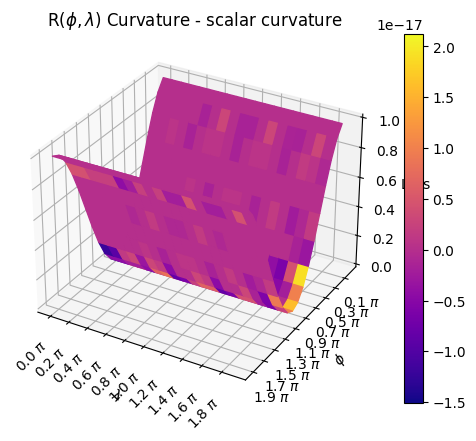

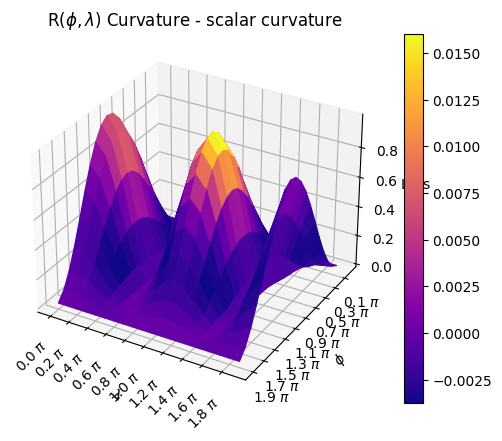

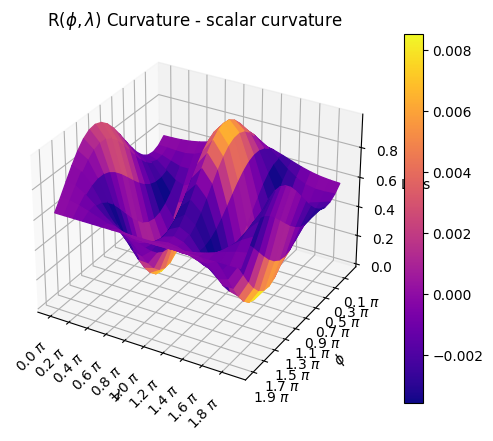

In [ ]:
# EXP on Pauli-Y
run_pauli_y()

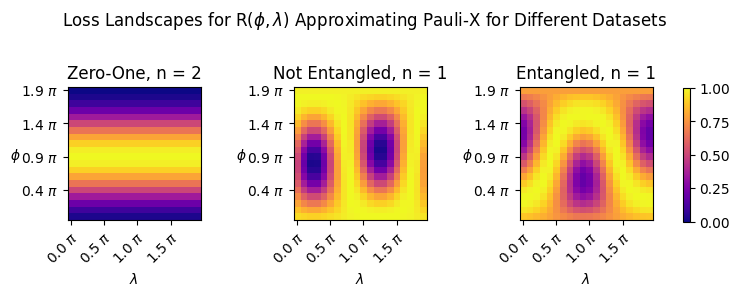

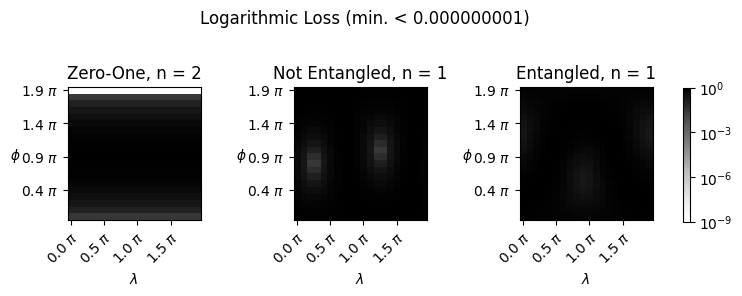

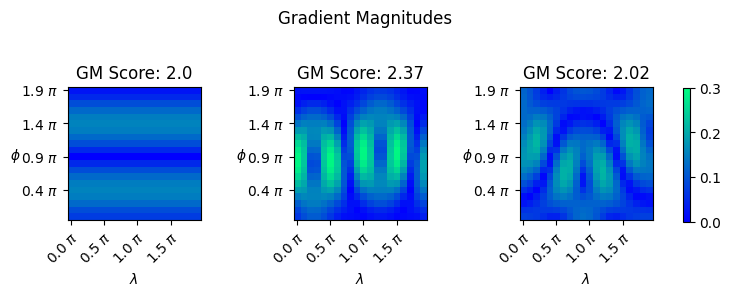

20
20
20
TOTAL VARIATION:  12.56 18.04 15.86
IGSD (dir 1):  9.09
IGSD (dir 2):  inf
---------
IGSD (dir 1):  14.75
IGSD (dir 2):  8.01
---------
IGSD (dir 1):  16.37
IGSD (dir 2):  10.39
---------
Frequency Domain for Plot 3


c:\Users\victo\Desktop\master-thesis\Code\entangled_qnn_training-main\victor_thesis_metrics.py:95: RuntimeWarning: divide by zero encountered in divide
  return np.round(inverse_gradient_standard_deviations, 2)


Fourier Density: 1.1


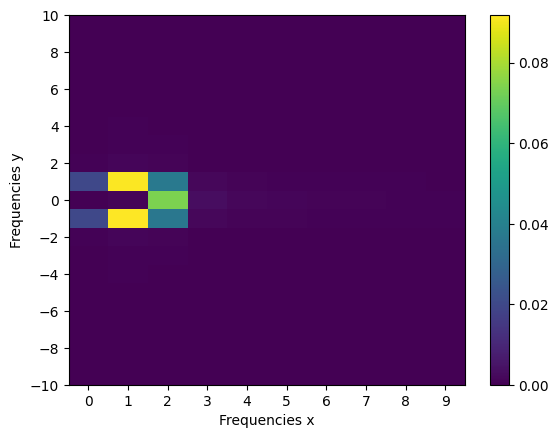

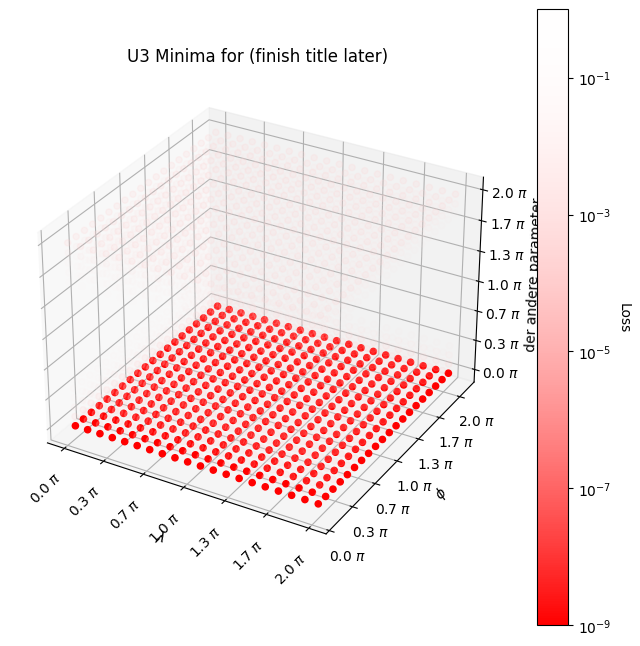

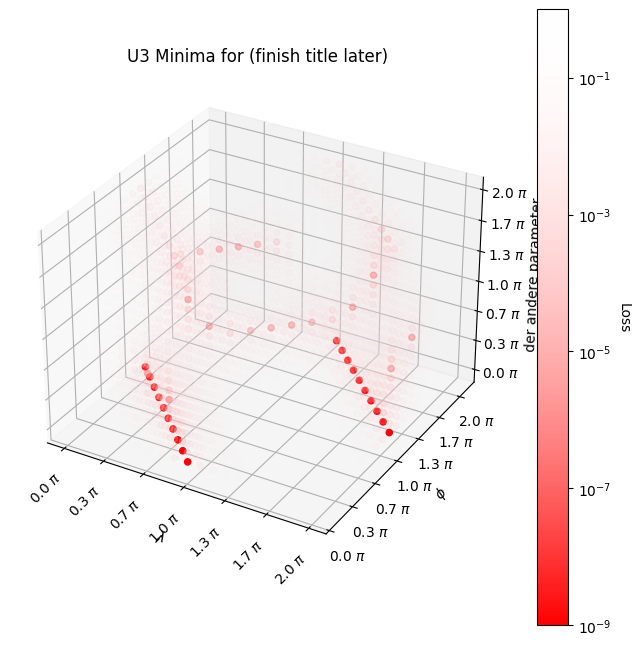

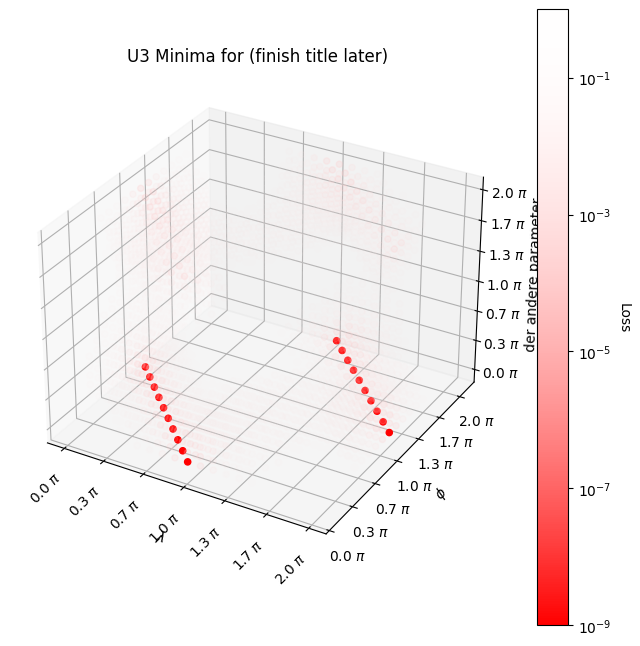

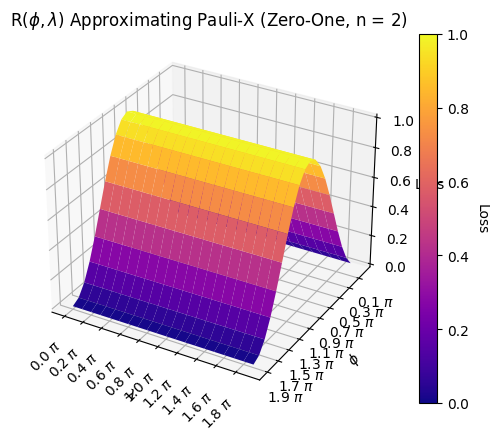

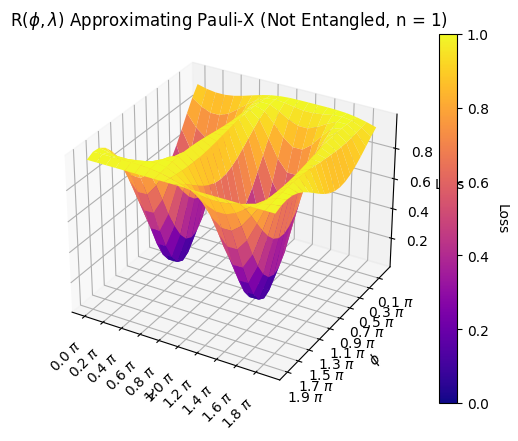

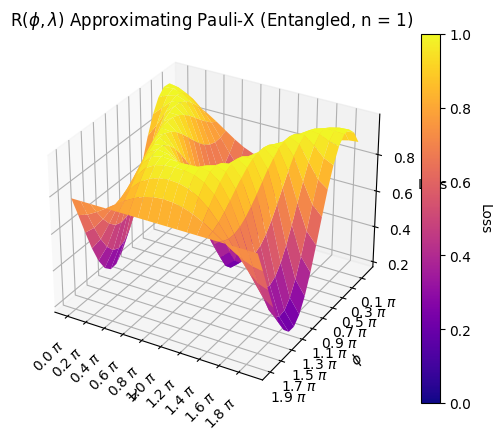

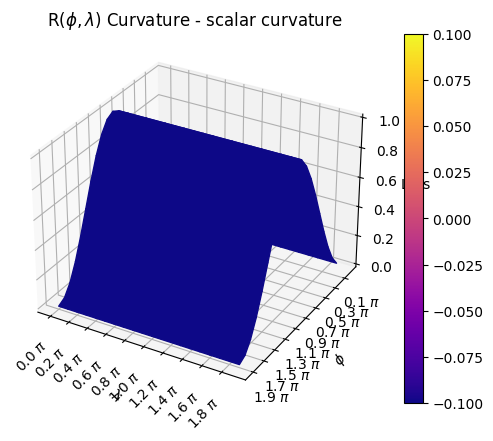

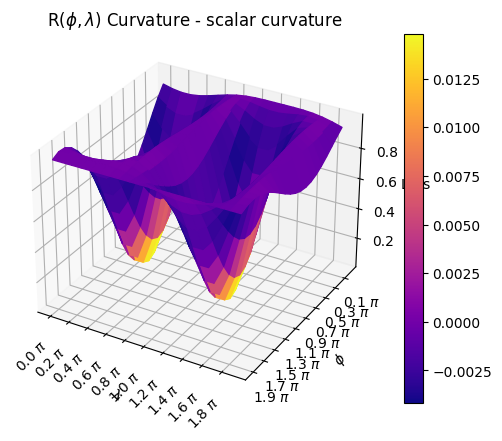

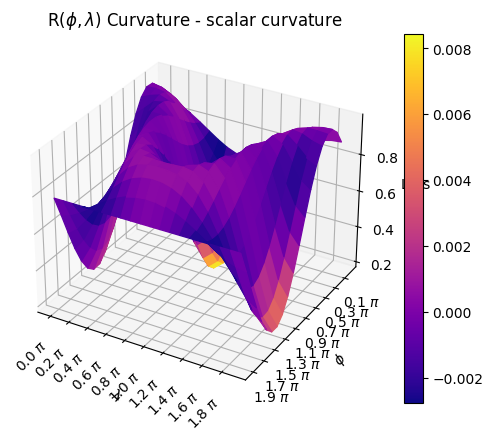

In [ ]:
# EXP on Pauli-Z
run_pauli_z()

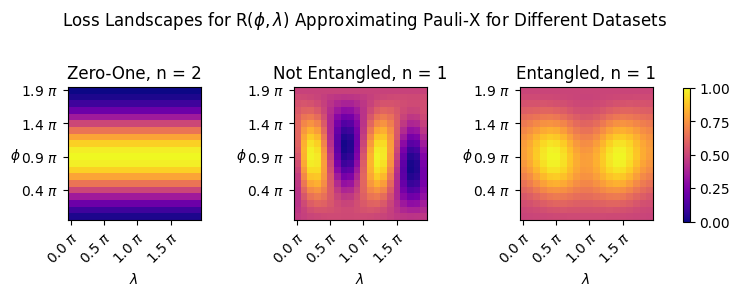

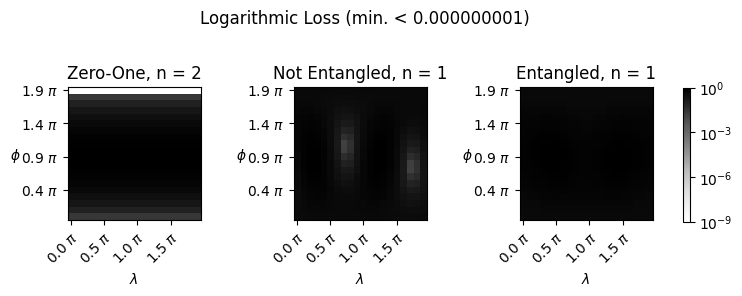

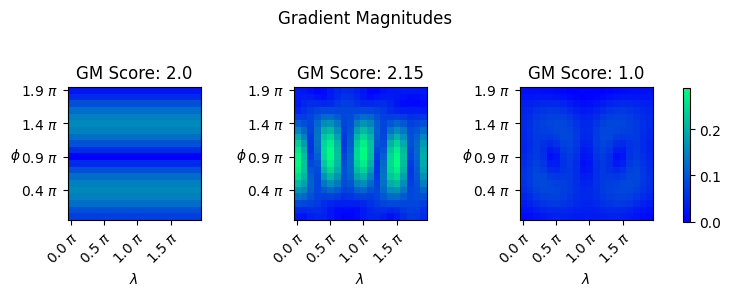

TOTAL VARIATION:  12.56 16.05 7.87
IGSD (dir 1):  9.09
IGSD (dir 2):  inf
---------
IGSD (dir 1):  23.67
IGSD (dir 2):  8.14
---------
IGSD (dir 1):  22.61
IGSD (dir 2):  32.81
---------
Frequency Domain for Plot 3


c:\Users\victo\Desktop\master-thesis\Code\entangled_qnn_training-main\victor_thesis_metrics.py:94: RuntimeWarning: divide by zero encountered in divide
  inverse_gradient_standard_deviations = np.divide(1, gradient_standard_deviations)


Fourier Density: 1.632


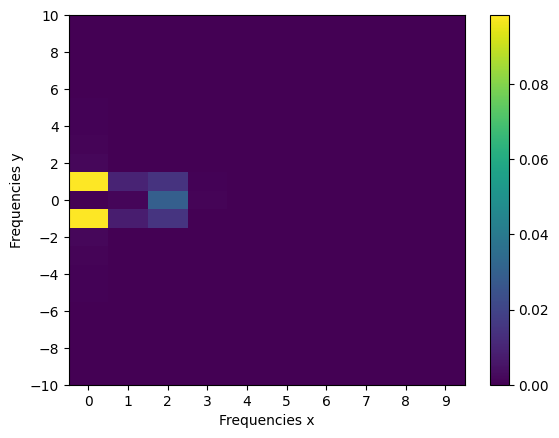

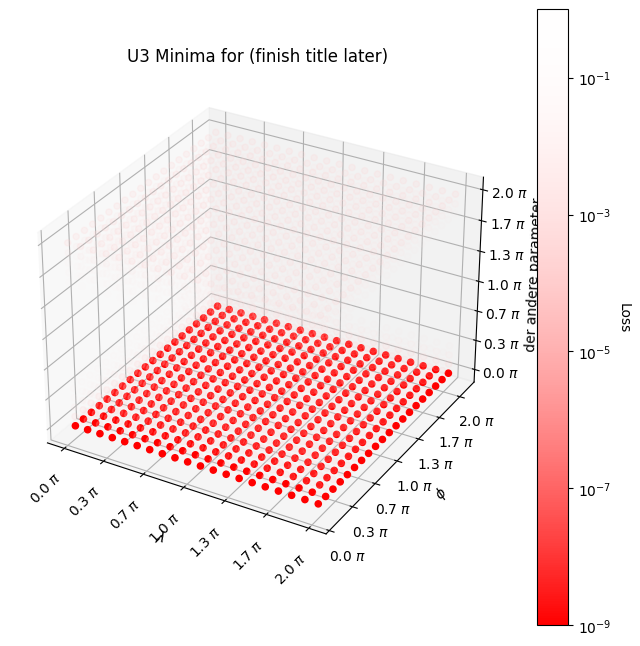

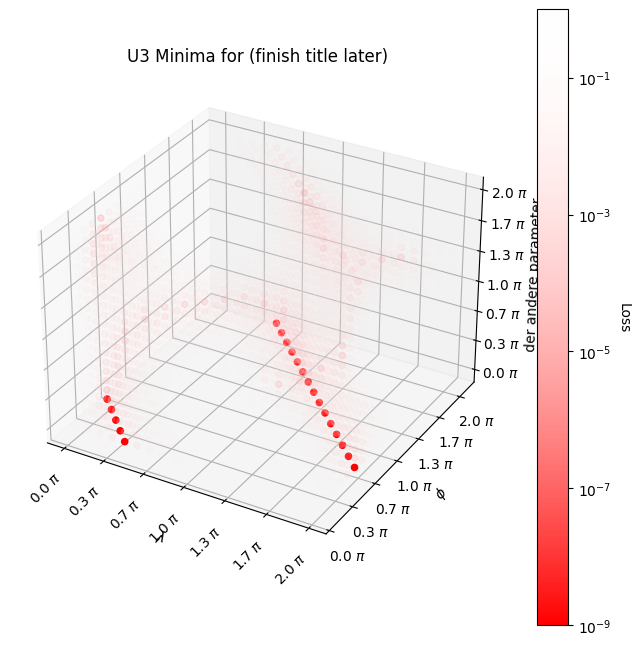

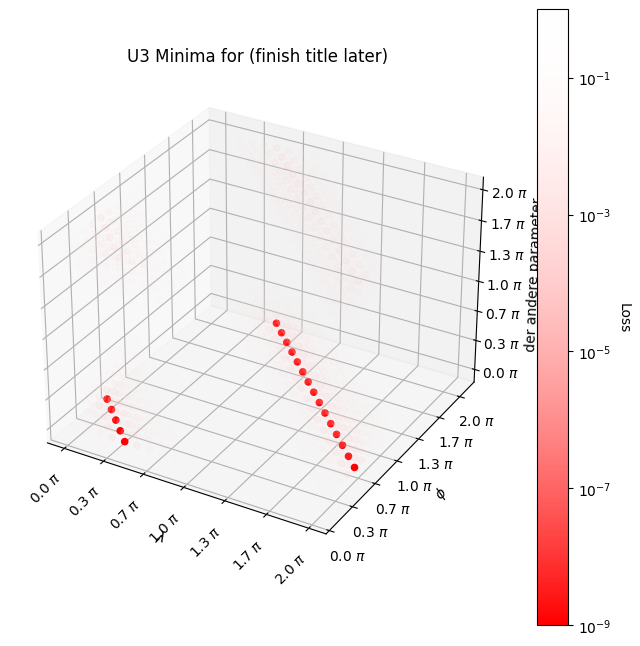

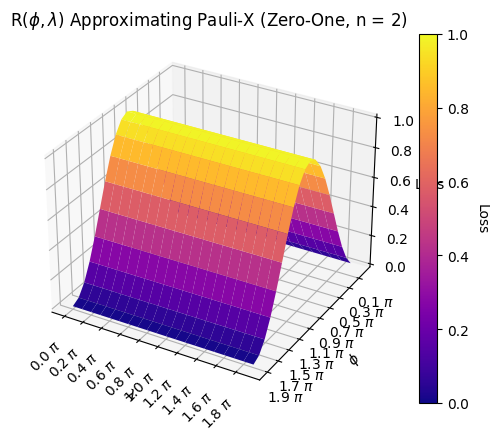

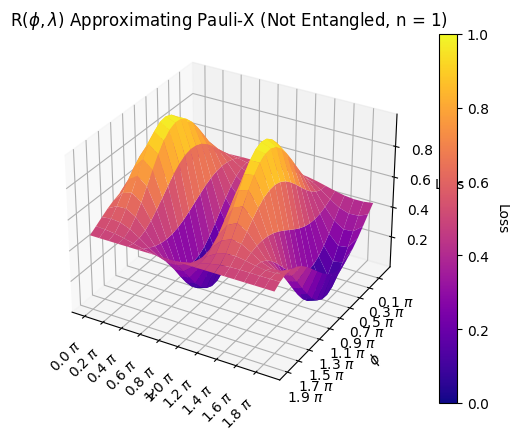

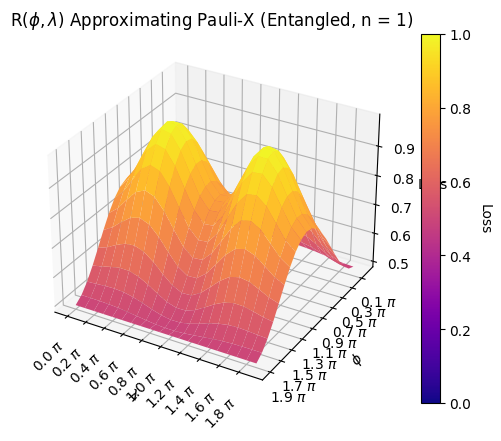

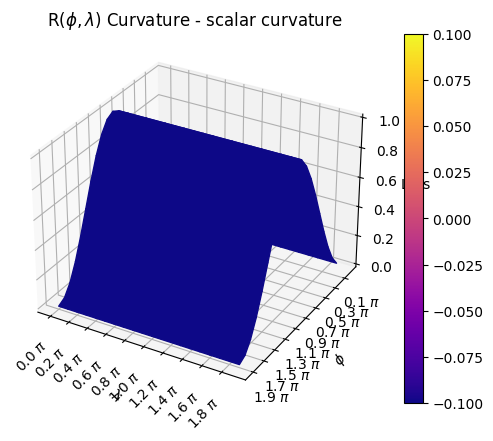

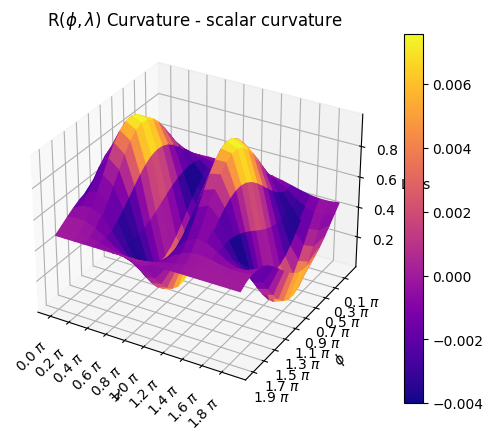

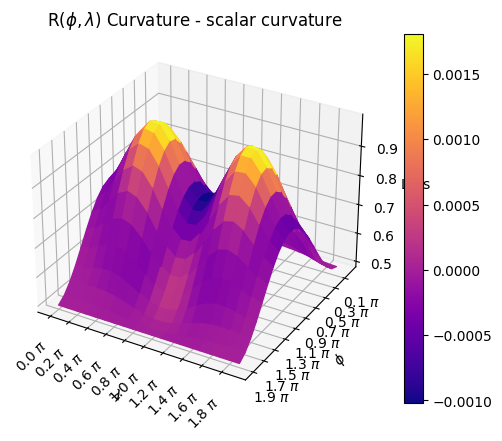

In [ ]:
# EXP on Phase (S)
run_phase_s()